
## Purpose
In this article, we will cover what linear regression is, what the underlying mathematics looks like, common metrics to evaluate the model, along with an example of how to use it.

## What is Linear Regression
Linear regression, as the name implies, is a linear model used for making real value predictions. It is a comparatively simple model, that is mathematically sound, easy to explain, and easy to understand. Due to its simplicity, it typically doesn’t require a large amount of data to be a useful model.

It is not uncommon for linear regression to be used as a baseline model, meaning the first model to try and to compare future iterations against, when approaching a new regression problem.  The underlying assumption you must have prior to using this model is that the relationship between the dependent and independent variables is linear.

## Math behind Linear Regression
In most instances you can think of a model as an equation. Our goal is to iteratively adjust the parameters of the equation such that it fits the training data (ie. minimizes the difference between predicted $\hat{y}$ and $y$. With linear regression, our model is a linear equation:
$$\hat{y} = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \beta_{n+1}$$

Where the $\beta$ variables are our parameters being adjusted,the $x$ values are the variables, or features, in our training set, $\beta_{n+1}$ is our intercept, and finally, $\hat{y}$ is our predicted value.

This equation can be condensed and written more elegantly using vector notation, which we will use for the remainder of this article. To do so, we add an imaginary variable, $x_{n+1}$, that always equals 1, to our data. We do this to simplify the math with our intercept. Then we can compact it.

$$\hat{y} = \vec{\beta} \vec{X}$$

We have our model, now what? We need to define our problem. We want to minimize the difference between our predicted value, $\hat{y}$, and our actual observed value $y$. Thus, our **objective function** is:
$$\vec{\hat{\beta}}=\min_{\vec{\hat{\beta}}} L(D, \vec{\beta}) =\min_{\vec{\hat{\beta}}} \sum_{i=1}^{n}{(\hat{\beta} .\vec{x_i} - y_i)^2}$$

In the equation above, $L(D,\vec{\beta})$ is the notation used to indcate what our **loss function** is. $D$ being the matrix of data, and $\vec{\beta}$ being the vector of parameters on our function, to be applied to the data in order to  Below, we will expand the equation, so that we can more easily manipulate it.

$$L(D,\vec{\beta})=||X\vec{\beta} - Y||^2$$
$$=(X\vec{\beta}-y)^T(X\vec{\beta}-Y)$$
$$=Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}^TX^TX\vec{\beta}$$

Now, to find the values that minimize the function, we take the gradient and set it to 0.

Get gradient w.r.t. $\vec{\beta}$

$$\frac{\partial{L(D,\vec{\beta})}}{\partial{\vec{\beta}}} = \frac{\partial{(Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}X^TX\vec{\beta}})}{\partial{\vec{\beta}}}$$
$$= -2Y^TX+2\vec{\beta}^TX^TX$$
$$=-2Y^TX+2\vec{\beta}+2\vec{\beta}^TX^TX$$

Set gradient to zero and solve for $\hat{\beta}$.

$$-2Y^TX+2\vec{\beta}^TX^TX=0$$
$$Y^TX=\vec{\beta}^TX^TX$$
$$X^TY=X^TX\vec{\beta}$$


Now, with one last manipulation of the equation above, we optimize the parameters $\vec{\beta}$ using ordinary least squares (OLS)

$$\hat{\beta} = (\vec{X}^{T} \vec{X})^{-1} \vec{X}^{T} \vec{y}$$

Notice the above equation is entirely solvable, in closed form. There are no parameters on the right hand side of the equation. Solving the equation, will give us the optimal values for $\hat{\beta}$, that minimize the loss function, ie. the difference between $\hat{y}$ and $y$.

Also of note, if you recall solving systems of equations in school; where if you have $x$ equations containing
$x$ variables, and you're able to solve for the each of the variables through manipulations of the equations. OLS is very much like the solutions you learned, except there has to be aproximations, since there are likely stochastic elements and unknown variables also influencing $y$.

## Example

For the example, we are going to use a public dataset containing height and weight. Based on height, we are going to attempt to predict weight using linear regression with OLS optimization.

The first thing we need to do, is import our libraries. We are going to use Pandas so that we can read in the data easily. We are importing NumPy so we can matrix and vector manipulations more seamlessly, and we are importing MatPlotLib so we can visualize the results afterwards.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Here we are reading in the data.

In [30]:
#data = data.sample(n=1000, random_state=1)
url = "https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv"
data = pd.read_csv(url)
X = data["Height"].values
y = data["Weight"].values
data.sample(5)

,Gender,Height,Weight
7884,Female,66.652188,152.697851
2171,Male,65.325330,163.055142
846,Male,69.844564,198.630278
7819,Female,63.420513,134.999571
4334,Male,65.895215,151.183699


So effectively, the model (or equation) that is constructed for this problem is as follows:
$$\hat{y} = x_0 \beta_0 + \beta_1$$
where $x_0$ is the variable that represents Height.

Now that is sorted, we're on to the interesting part. We are building our model object. the ols() function is what actually fits our model paramters (betas) to the data. The predict() function then applies our fitted model to data.


In [12]:
class linear_regression:
    def __init__(self, X, y):
        self.betas = self.ols(X, y)

    def ols(self,X, y):
        X = np.array([np.ones(len(X)),X]).T
        betas = np.linalg.pinv(X.T @ X) @ X.T @ y
        return betas

    def predict(self, X):
        return np.array([np.ones(len(X)),X]).T @ self.betas  

Now we create our a instance of our linear_regression object and name it $lm$. We pass through the trianing data, $X$ and $y$, and we get a fitted model, with the $\beta$ values outputted below.

In [13]:
lm = linear_regression(X, y)
lm.betas

array([-350.73719181,    7.71728764])

To verify our logic is correct, we can also import the LinearRegression class from sklearn and see if we get the same results.


In [16]:
model = LinearRegression().fit(X.reshape(-1,1),y)
print(model.coef_)
print(model.intercept_)

[7.71728764]
-350.7371918121411


## Metrics

So, we have a linear regression model, and we've fitted it to some data. That's great, but how do we know how well it is fitted? What metrics should we use to evaluate the model?

First we have **mean squared residual (MSR)**. We figure out how far off our prediction is from the actual value, for each observation. We square the error, so all values are the same sign now (ie. positive). We then calculate the mean of all the squared errors, by summing them together and dividing the total by the number of observations. A downside of this metric is that can be difficult for the layman to interpret.

But first, let's define residual $\hat{e}$ as follows:
$$\hat{e_i} = (y_i - \hat{y_i})$$
Now, we can define MSE as:
$$MSE = \frac{1}{n} \sum_{i=1}^n{(\hat{e_i})^2}$$

By taking the root of MSE, we get the **root mean squared residual (RMSR)**. Taking the root of the MSE gives us a more interpretable variable. The RMSE can now be interpreted as the average absolute difference between the predicted value and the actual value. The lower the value, the better.

$$RMSE = \sqrt{MSE}$$

**Important Note:** We are using residual instead of error in this example, since we are calculating the metric from the same sample of data the model was trained on (training set). If instead we calculated the above two metrics against an of of sample population, such as a test set, we would call them **Mean Square Error (MSE)** and root **mean square error (RMSE).**

The **residual sum of squares (RSS)** is just the sum of squared residuals
$$RSS = \sum_{i=1}^n{(\hat{e_i})^2}$$

The **Total sum of squares** is the sum of squared differnces between an observed value $y_i$ and the mean value $\bar{y}$. Notice this metric is completely independent of the model. This metric is used in $R^2$ as a way of comparing what percentage of variance is explained by the model.

$$TSS = \sum_{i=1}^n{(y_i - \bar{y})^2}$$

The **Coefficient of determination ($R^2$)** is a ratio of what percentage of the variance in the dependent variable has been accounted for. The higher the value, the better.
$$R^2 = 1 - \frac{RSS}{TSS}$$

Next, let's implement the metrics in our linear regression class we built above.You can see the updated code below.


In [18]:
class linear_regression:
    def __init__(self, X, y):
        self.betas = self.ols(X, y)
        self.metrics = {}
        self.get_metrics(X, y)

    def ols(self,X, y):
        X = np.array([np.ones(len(X)),X]).T
        betas = np.linalg.pinv(X.T @ X) @ X.T @ y
        return betas

    def predict(self, X):
        return np.array([np.ones(len(X)),X]).T @ self.betas

    def mse(self, X, y):
        y_hat = self.predict(X)
        self.metrics["MSE"] = np.mean((y-y_hat)**2)

    def rmse(self):
        self.metrics["RMSE"] = np.sqrt(self.metrics["MSE"])

    def RSS(self, y_hat, y):
        e = y - y_hat
        self.metrics["RSS"] = np.sum(e**2)

    def TSS(self, y):
        y_mean = np.mean(y)
        self.metrics["TSS"] = np.sum((y - y_mean)**2)

    def r_squared(self, y_hat, y):
        self.metrics["r_squared"] = 1 - (self.metrics["RSS"] / self.metrics["TSS"])

    def get_metrics(self, X, y):
        y_hat = self.predict(X)
        self.mse(X, y)
        self.rmse()
        self.RSS(y_hat, y)
        self.TSS(y)
        self.r_squared(y_hat, y)

Creating an updated instance of the linear regression class and fitting the same data, we can now see the metrics.

We have a RMSE of ~12, meaning that on average, the difference between the actual value $y_i$ and the predicted value $\hat{y_i}$ is plus or minus 12. Remember we're predicting weight (pounds), so plus or minus 10 lbs, intuitively, is probably not very good.

This is further highlighted in the $R^2$ value of 0.86. This implies that our model accounts for 86% of the variance in the dependent variable, which is not too shabby.

In [19]:
lm = linear_regression(X, y)
lm.metrics

{'MSE': 149.2934839491296,
 'RMSE': 12.218571272826035,
 'RSS': 1492934.839491296,
 'TSS': 10308487.602498457,
 'r_squared': 0.8551742120609958}

Below, we visualize the results. We have a scatter plot of all the data points. The blue line is the predicted value of weight, given height. The red lines are plus 10 and minus 10 the predicted value. Illustrating that as the RMSE suggests, the predicted value is usually plus or minus the RMSE of the actual value.

Text(0.5, 1.0, 'Predicting Weight from Height')

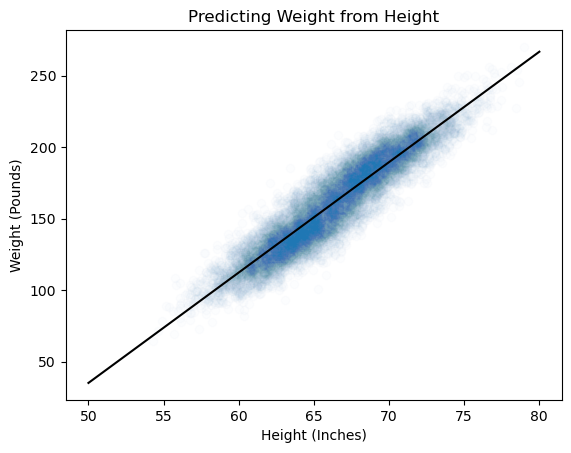

In [26]:
plt.plot([50,80],[lm.predict([50]),lm.predict([80])],'black')
plt.scatter(X,y,alpha=0.01)
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.title("Predicting Weight from Height")

## conclusion

We discussed what linear regression was intuitively, mathematically, and demonstrated the concepts with coded examples. We then went on to discuss some key metrics surrounding linear regression in detail, again with coded examples.

I hope this was blog post proves to be as useful to you reading it, as it was to me writing it. 

Thanks all for reading.